In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt


In [18]:
# https://medium.com/analytics-vidhya/q-learning-is-the-most-basic-form-of-reinforcement-learning-which-doesnt-take-advantage-of-any-8944e02570c5

def Qtable(state_space, action_space, bin_size=30):

    bins = [np.linspace(-4.8, 4.8, bin_size),
            np.linspace(-4, 4, bin_size),
            np.linspace(-0.418, 0.418, bin_size),
            np.linspace(-4, 4, bin_size)]

    q_table = np.random.uniform(
        low=-1, high=1, size=([bin_size] * state_space + [action_space]))
    return q_table, bins


def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(
        np.digitize(state[i], bins[i]) - 1)
    return tuple(index)


def Q_learning(q_table, bins, episodes=5000, gamma=0.95, lr=0.1, timestep=100, epsilon=0.2, DECAY=True, base = 0.9):
    rewards = []
    steps = 0
    # for episode in range(1, episodes+1):
    for episode in range(0, episodes):
        steps += 1
        # env.reset() => initial observation
        current_state = Discrete(env.reset(), bins)

        score = 0
        done = False
        while not done:
            # if episode % timestep == 0: env.render()
            if np.random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample()
            else:
                    action = np.argmax(q_table[current_state])
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)
            score+=reward
            
            if not done:
                    max_future_q = np.max(q_table[next_state])
                    current_q = q_table[current_state+(action,)]
                    new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                    q_table[current_state+(action,)] = new_q
            current_state = next_state
        
        if DECAY:
            epsilon = np.power(base, episode)
        # End of the loop update
        rewards.append(score)
        # else:
        #     rewards.append(score)
        #     if score > 195 and steps >= 100: print('Solved')
        # if episode % timestep == 0: print(reward / timestep)
    
    return np.array(rewards)
     

In [19]:
state_space = 4 # number of states
action_space = 2 # number of possible actions
env = gym.make('CartPole-v0')
seed = 42
# seed = int(time.time()) #1630937434
np.random.seed(seed)    
env.seed(seed)

q_table, bins = Qtable(state_space, action_space)
rewards = Q_learning(q_table, bins, episodes=10000, epsilon=1)



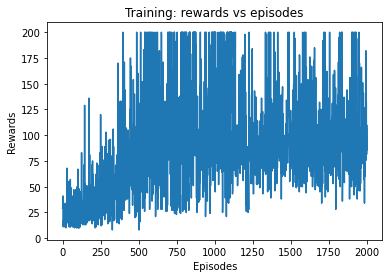

(30, 30, 30, 30, 2)


In [20]:
plt.plot(rewards[:2000])
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Training: rewards vs episodes')
plt.show()

print(q_table.shape)